In [1]:
# Import necessary libraries
import pandas as pd

# Load the Excel file and read the "Orders" sheet
file_path = 'SuperStoreUS-2015 1.xlsx'
orders_data = pd.read_excel(file_path, sheet_name='Orders')

In [2]:
# Step 1: Dataset Overview
print("Dataset Overview:")
print(f"Total Rows: {orders_data.shape[0]}")
print(f"Total Columns: {orders_data.shape[1]}")
print(f"Columns with Missing Values:\n{orders_data.isnull().sum()}\n")

Dataset Overview:
Total Rows: 1952
Total Columns: 25
Columns with Missing Values:
Customer Name            0
Customer ID              0
Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64



In [3]:
# Step 2: Summary Statistics for Numerical Columns
numerical_summary = orders_data.describe()
print("Summary Statistics (Numerical Data):")
print(numerical_summary)

Summary Statistics (Numerical Data):
       Customer ID        Row ID     Discount   Unit Price  Shipping Cost  \
count  1952.000000   1952.000000  1952.000000  1952.000000    1952.000000   
mean   1735.376537  19916.479508     0.048975   109.079221      12.968151   
min       3.000000     64.000000     0.000000     1.140000       0.490000   
25%     875.000000  19121.000000     0.020000     6.480000       3.230000   
50%    1738.000000  21164.500000     0.050000    20.990000       6.150000   
75%    2578.250000  23483.250000     0.080000   100.972500      14.362500   
max    3403.000000  26389.000000     0.210000  6783.020000     164.730000   
std     991.078006   5957.595627     0.031378   393.481301      17.414631   

       Product Base Margin   Postal Code                     Order Date  \
count          1936.000000   1952.000000                           1952   
mean              0.515186  51534.769467  2015-03-29 01:21:08.852459008   
min               0.350000   1001.000000    

In [4]:
# Highlight key statistics
print("\nKey Statistics:")
print(f"Discount: Ranges from {orders_data['Discount'].min()} to {orders_data['Discount'].max()} (Mean: {orders_data['Discount'].mean()})")
print(f"Unit Price: Ranges from {orders_data['Unit Price'].min()} to {orders_data['Unit Price'].max()} (Mean: {orders_data['Unit Price'].mean()})")
print(f"Profit: Ranges from {orders_data['Profit'].min()} to {orders_data['Profit'].max()} (Mean: {orders_data['Profit'].mean()})")
print(f"Sales: Ranges from {orders_data['Sales'].min()} to {orders_data['Sales'].max()} (Mean: {orders_data['Sales'].mean()})")
print(f"Quantity ordered new: Ranges from {orders_data['Quantity ordered new'].min()} to {orders_data['Quantity ordered new'].max()} (Mean: {orders_data['Quantity ordered new'].mean()})\n")


Key Statistics:
Discount: Ranges from 0.0 to 0.21 (Mean: 0.048975409836065575)
Unit Price: Ranges from 1.14 to 6783.02 (Mean: 109.07922131147541)
Profit: Ranges from -16476.838 to 9228.2256 (Mean: 114.79385852313011)
Sales: Ranges from 2.25 to 45737.33 (Mean: 985.8288319672131)
Quantity ordered new: Ranges from 1 to 167 (Mean: 12.944672131147541)



In [5]:
# Step 3: Handling Missing Values
print("Handling Missing Values:")
missing_values = orders_data.isnull().sum()
if missing_values.any():
    print(f"Missing values detected:\n{missing_values}\n")
    # Example of filling missing values with mean (optional)
    orders_data['Product Base Margin'].fillna(orders_data['Product Base Margin'].mean(), inplace=True)
    print("Missing values in 'Product Base Margin' column filled with the mean.")
else:
    print("No missing values detected.\n")

Handling Missing Values:
Missing values detected:
Customer Name            0
Customer ID              0
Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

Missing values in 'Product Base Margin' column filled with the mean.


/var/folders/s4/bfhhymdd2qs7h84xs8jxyqw00000gn/T/ipykernel_1514/2946679082.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_data['Product Base Margin'].fillna(orders_data['Product Base Margin'].mean(), inplace=True)


In [6]:
# Step 4: Descriptive Analysis
print("Descriptive Analysis:")
overall_metrics = {
    "Total Sales": orders_data["Sales"].sum(),
    "Total Profit": orders_data["Profit"].sum(),
    "Average Discount": orders_data["Discount"].mean(),
    "Average Sales": orders_data["Sales"].mean(),
    "Average Profit": orders_data["Profit"].mean(),
    "Total Orders": len(orders_data),
}
print(overall_metrics)

Descriptive Analysis:
{'Total Sales': 1924337.88, 'Total Profit': 224077.61183714998, 'Average Discount': 0.048975409836065575, 'Average Sales': 985.8288319672131, 'Average Profit': 114.79385852313011, 'Total Orders': 1952}


In [7]:
# Breakdown by Product Category
category_metrics = orders_data.groupby("Product Category").agg(
    Total_Sales=("Sales", "sum"),
    Average_Sales=("Sales", "mean"),
    Total_Profit=("Profit", "sum"),
    Average_Profit=("Profit", "mean"),
    Average_Discount=("Discount", "mean"),
    Total_Orders=("Order ID", "count"),
).sort_values(by="Total_Sales", ascending=False)
print("\nMetrics by Product Category:")
print(category_metrics)


Metrics by Product Category:
                  Total_Sales  Average_Sales  Total_Profit  Average_Profit  \
Product Category                                                             
Technology          712264.95    1480.800312  75303.156364      156.555419   
Furniture           660704.31    1651.760775  59249.445936      148.123615   
Office Supplies     551368.62     514.816639  89525.009537       83.590112   

                  Average_Discount  Total_Orders  
Product Category                                  
Technology                0.047755           481  
Furniture                 0.049800           400  
Office Supplies           0.049216          1071  


In [8]:
# Step 5: Time-Series Analysis
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])
time_series_sales = orders_data.groupby(orders_data['Order Date'].dt.to_period("M")).agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
)
print("\nMonthly Sales and Profit Trends:")
print(time_series_sales)


Monthly Sales and Profit Trends:
            Total_Sales  Total_Profit
Order Date                           
2015-01       274766.92   1043.677500
2015-02       326101.47  35944.658780
2015-03       271696.67    103.159587
2015-04       389831.95  53146.412502
2015-05       306572.07  67002.732858
2015-06       355368.80  66836.970610


In [10]:
# Step 6: Top Products and Customers
top_products = orders_data.groupby("Product Name").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
).sort_values(by="Total_Sales", ascending=False).head(10)

top_customers = orders_data.groupby("Customer Name").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
).sort_values(by="Total_Sales", ascending=False).head(10)

print("\nTop 10 Products by Sales:")
print(top_products)

print("\nTop 10 Customers by Sales:")
print(top_customers)



Top 10 Products by Sales:
                                                    Total_Sales  Total_Profit
Product Name                                                                 
Fellowes PB500 Electric Punch Plastic Comb Bind...     69013.48  23865.904200
Lexmark 4227 Plus Dot Matrix Printer                   61071.73   3700.374200
Global Troy™ Executive Leather Low-Back Tilter         50871.21  18628.145300
Okidata ML395C Color Dot Matrix Printer                47611.09   7709.310000
Polycom ViewStation™ ISDN Videoconferencing Unit       46538.69 -27621.245408
Economy Rollaway Files                                 35607.28   2481.442000
Smead Adjustable Mobile File Trolley with Locka...     23995.11   9906.619900
Hon 4700 Series Mobuis™ Mid-Back Task Chairs wi...     22554.43   5128.180000
SAFCO PlanMaster Heigh-Adjustable Drafting Tabl...     21253.25    846.567900
Riverside Palais Royal Lawyers Bookcase, Royale...     20915.17  -4612.141400

Top 10 Customers by Sales:
         

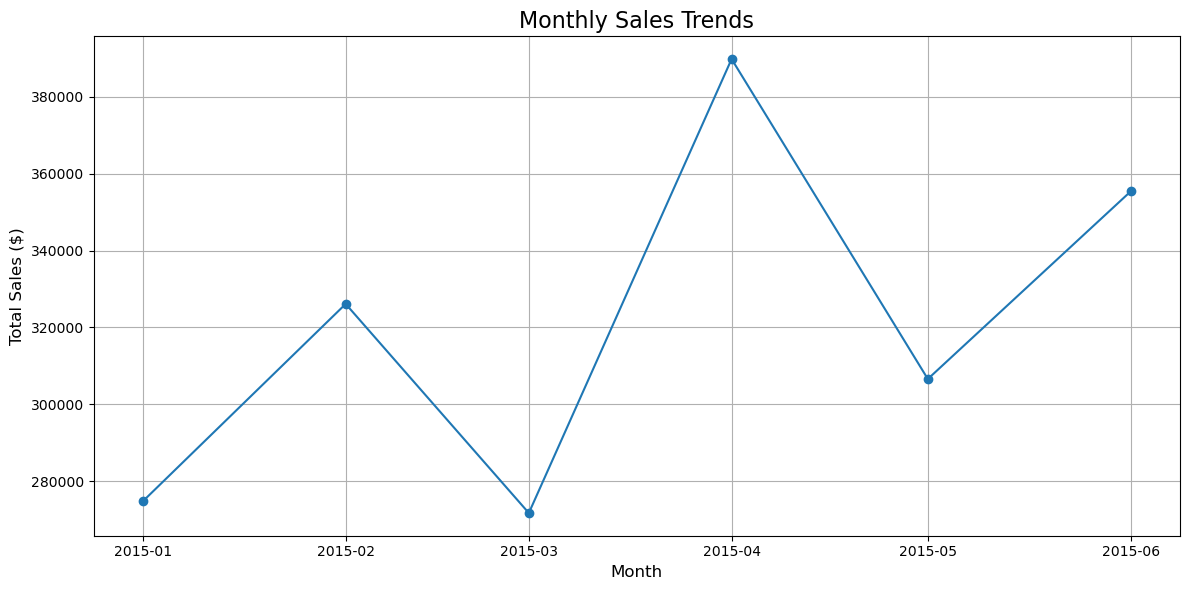

In [11]:
import matplotlib.pyplot as plt

# Step 5: Time-Series Visualization of Monthly Sales Trends
# Group by monthly sales
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])
monthly_sales = orders_data.groupby(orders_data['Order Date'].dt.to_period("M")).agg(
    Total_Sales=("Sales", "sum")
)

# Reset index for plotting
monthly_sales.reset_index(inplace=True)
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

# Plotting monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Total_Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


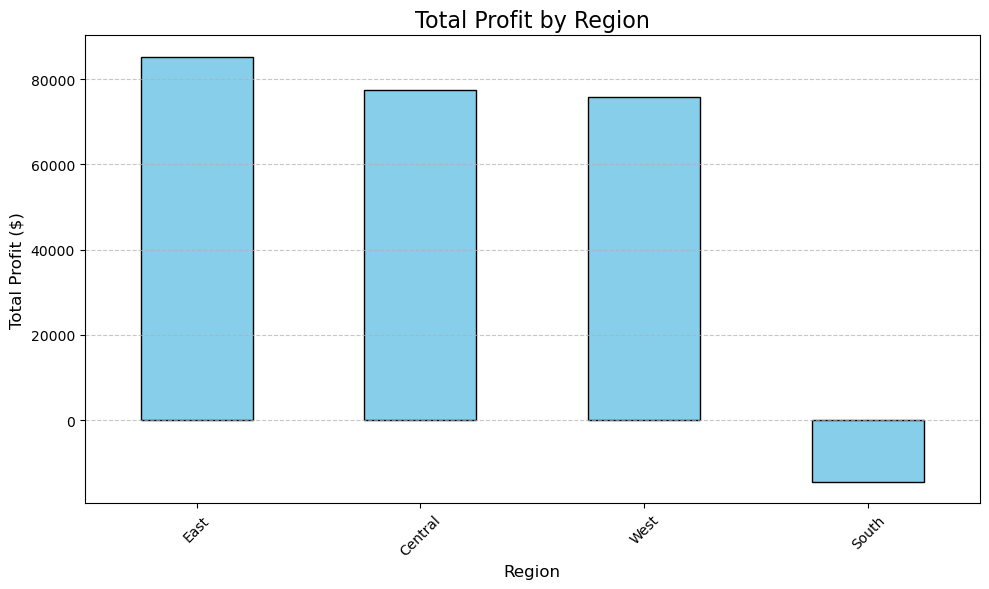

In [16]:
# Step 6: Profit Analysis by Region

# Grouping data by Region for Profit Analysis
region_profit = orders_data.groupby("Region").agg(
    Total_Profit=("Profit", "sum"),
    Average_Profit=("Profit", "mean"),
    Total_Sales=("Sales", "sum"),
    Order_Count=("Order ID", "count")
).sort_values(by="Total_Profit", ascending=False)

# Visualizing the Profit by Region
plt.figure(figsize=(10, 6))
region_profit["Total_Profit"].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



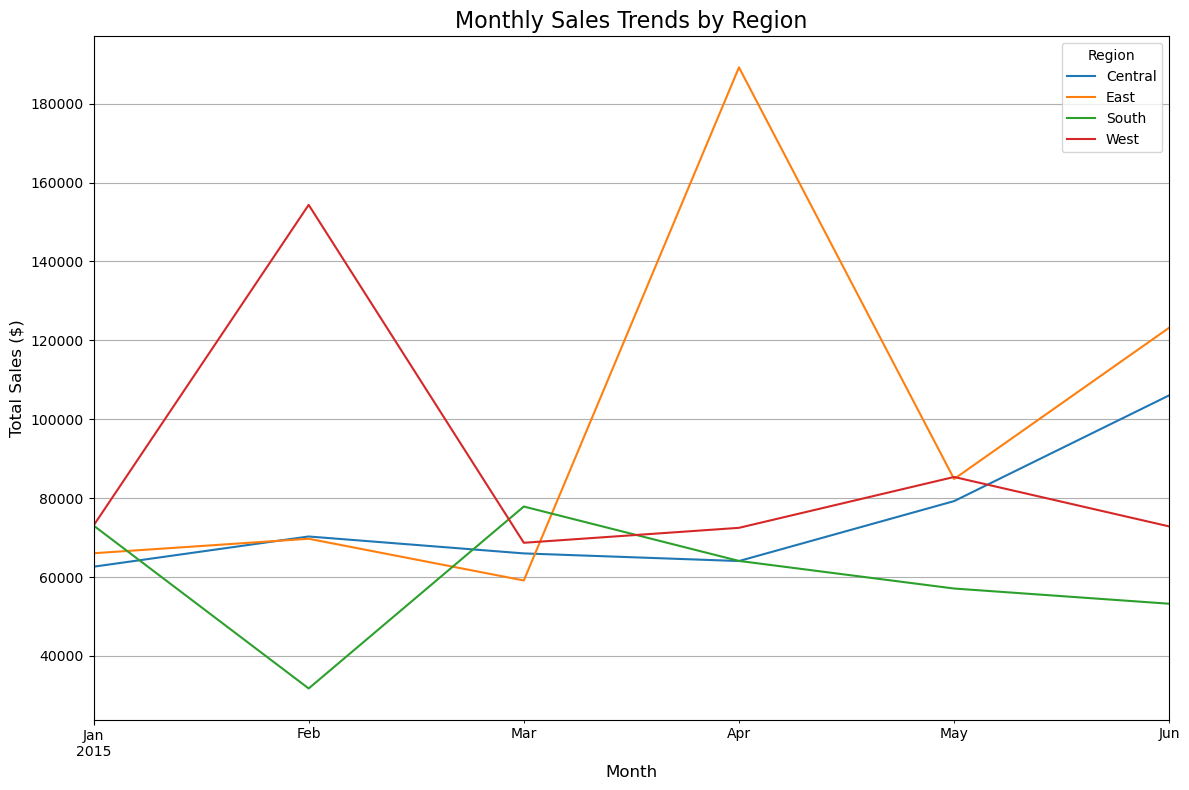

In [17]:
# Step 7: Sales Trends by Region

# Grouping data by Region and Month for Sales Trends
sales_trends_region = orders_data.groupby(
    [orders_data['Order Date'].dt.to_period("M"), "Region"]
).agg(Total_Sales=("Sales", "sum")).reset_index()

# Converting Period to Timestamp for plotting
sales_trends_region['Order Date'] = sales_trends_region['Order Date'].dt.to_timestamp()

# Pivot data for visualization
sales_trends_pivot = sales_trends_region.pivot(index='Order Date', columns='Region', values='Total_Sales')

# Plotting Sales Trends by Region
plt.figure(figsize=(12, 8))
sales_trends_pivot.plot(ax=plt.gca())
plt.title('Monthly Sales Trends by Region', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Region', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()



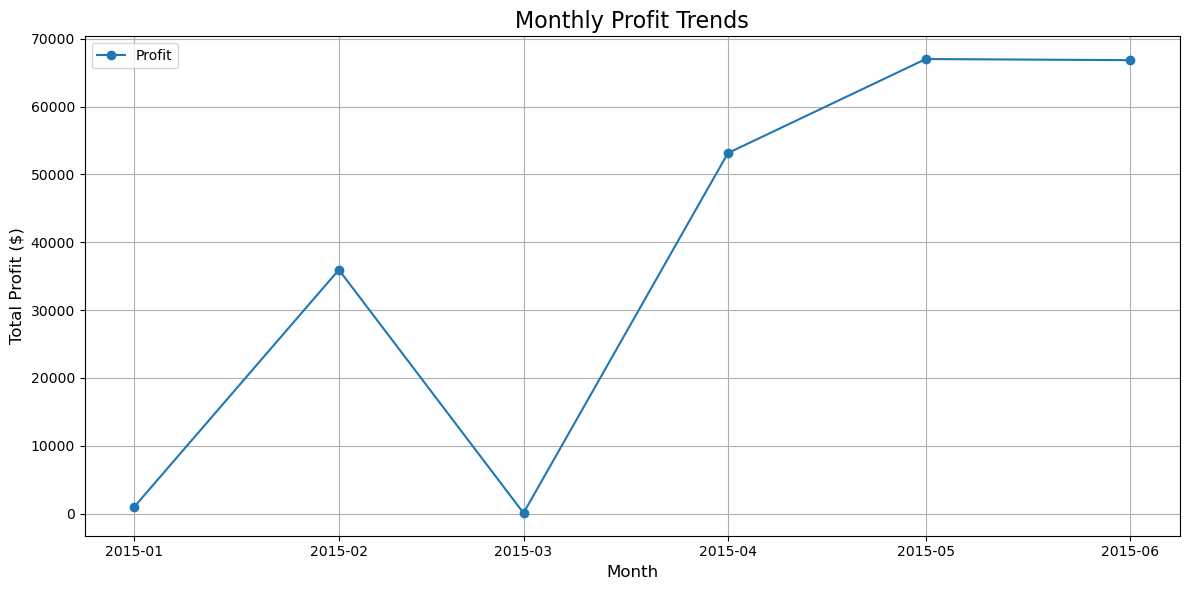

In [19]:
# Step 8: Monthly Profit Trends
# Grouping data by Month for Profit Trends
profit_trends_monthly = orders_data.groupby(
    orders_data['Order Date'].dt.to_period("M")
).agg(Total_Profit=("Profit", "sum")).reset_index()

# Converting Period to Timestamp for plotting
profit_trends_monthly['Order Date'] = profit_trends_monthly['Order Date'].dt.to_timestamp()

# Plotting Monthly Profit Trends
plt.figure(figsize=(12, 6))
plt.plot(profit_trends_monthly['Order Date'], profit_trends_monthly['Total_Profit'], marker='o', linestyle='-', label='Profit')
plt.title('Monthly Profit Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



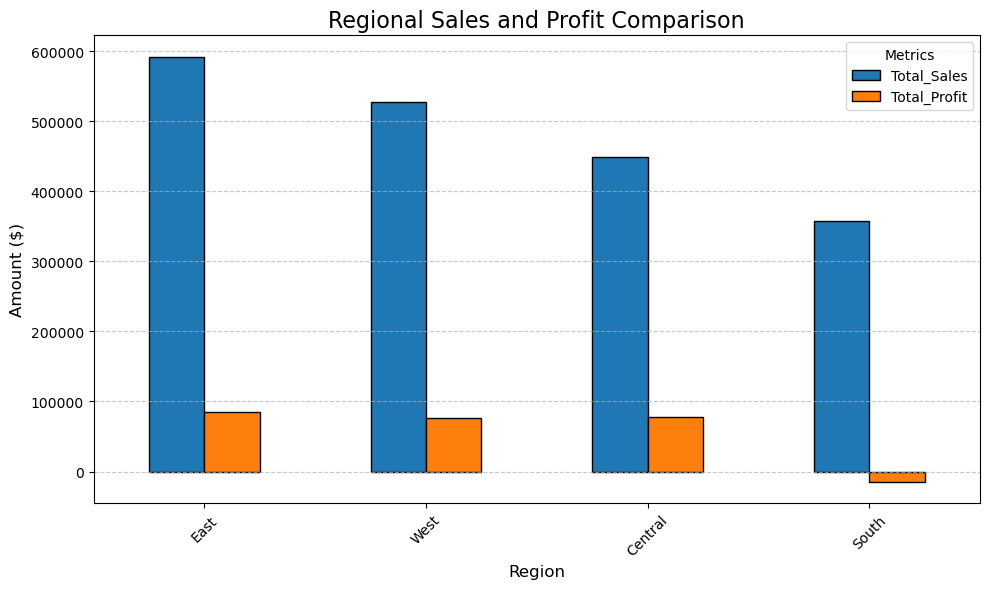

In [21]:
# Step 9: Regional Profit and Sales Comparison

# Grouping data by Region for Sales and Profit
region_sales_profit = orders_data.groupby("Region").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
).sort_values(by="Total_Sales", ascending=False)


# Plotting Sales and Profit by Region
fig, ax = plt.subplots(figsize=(10, 6))

region_sales_profit[['Total_Sales', 'Total_Profit']].plot(kind='bar', ax=ax, edgecolor='black')
plt.title('Regional Sales and Profit Comparison', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')
plt.show()



Top 10 Customers by Profit:
                     Total_Profit  Total_Sales
Customer Name                                 
Richard McClure        9300.34010     15269.70
Annie Odom             9243.25770     13424.37
Christopher Meadows    8839.22946     15224.63
Nina Horne Kelly       8533.42560     48295.12
Kelly Byers            7495.06100      8229.48
Helen Stein            7257.76000     10818.98
Jeanette Davies        7024.20690     10180.01
Scott McKenna          6610.20000      9580.00
Andrea Shaw            6106.72690      9603.24
Geoffrey H Wong        5998.03400       723.76


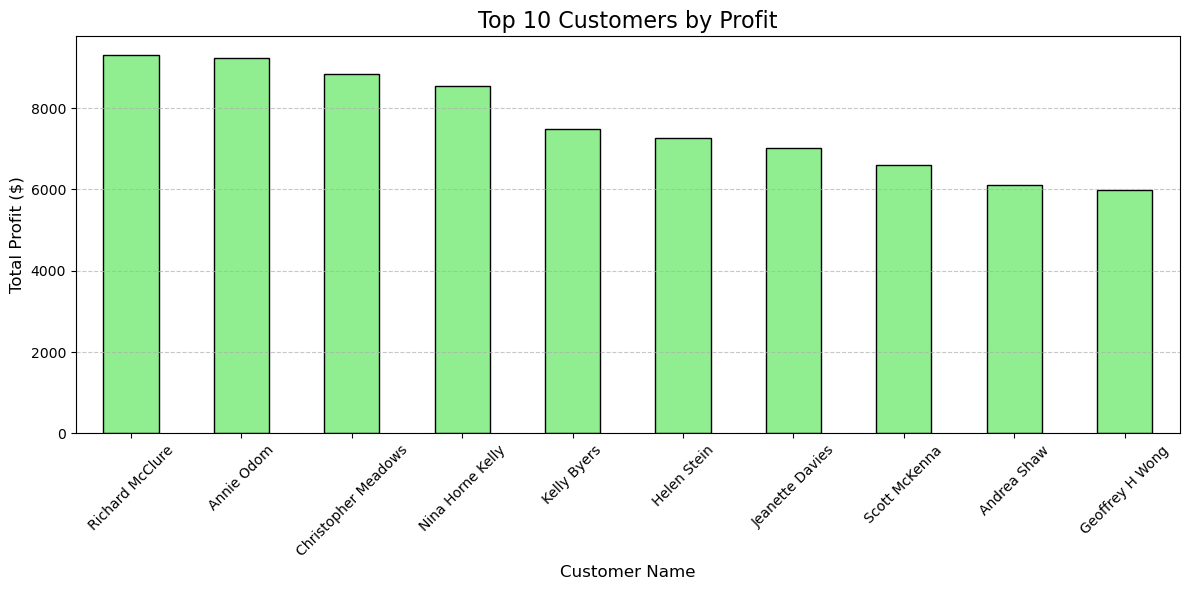

In [23]:
# Grouping data by Customer to analyze profit
top_customers_by_profit = orders_data.groupby("Customer Name").agg(
    Total_Profit=("Profit", "sum"),
    Total_Sales=("Sales", "sum")
).sort_values(by="Total_Profit", ascending=False).head(10)

# Displaying Top Customers by Profit in a readable tabular format
print("Top 10 Customers by Profit:")
print(top_customers_by_profit)

# Plotting Top 10 Customers by Profit
plt.figure(figsize=(12, 6))
top_customers_by_profit["Total_Profit"].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Customers by Profit', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


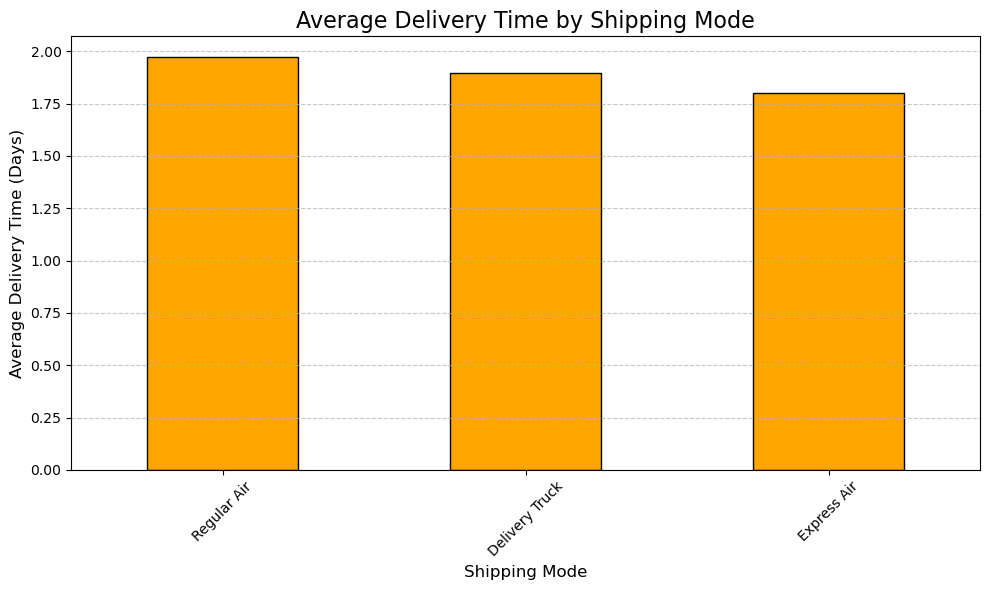

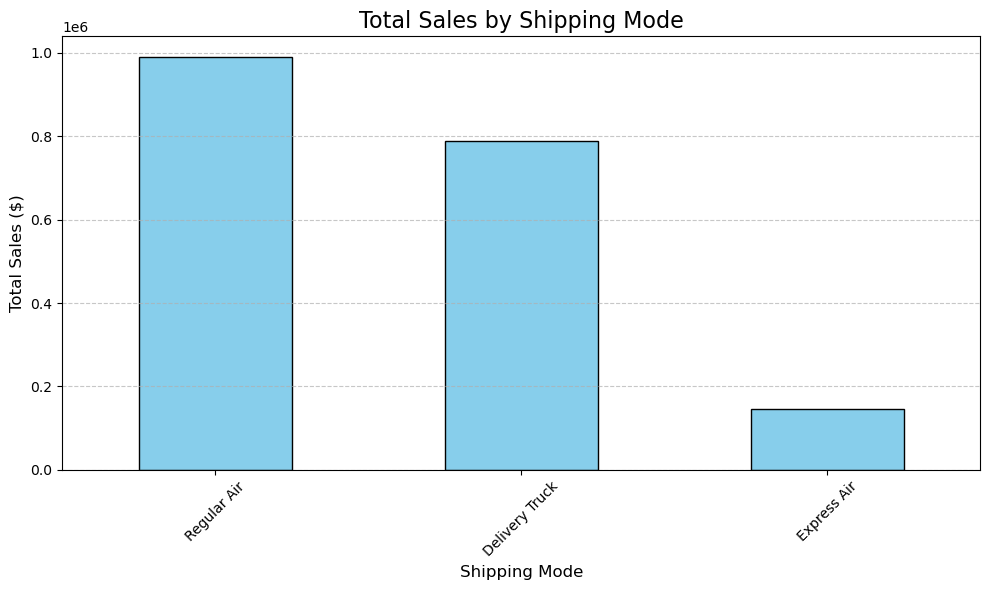

In [24]:
# Step 12: Shipping Modes and Delivery Impact Analysis

# Calculate delivery time (difference between Order Date and Ship Date)
orders_data['Delivery Time (Days)'] = (orders_data['Ship Date'] - orders_data['Order Date']).dt.days

# Group data by Shipping Mode for analysis
shipping_mode_analysis = orders_data.groupby("Ship Mode").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Average_Delivery_Time=("Delivery Time (Days)", "mean"),
    Order_Count=("Order ID", "count")
).sort_values(by="Total_Sales", ascending=False)


# Visualize Average Delivery Time by Ship Mode
plt.figure(figsize=(10, 6))
shipping_mode_analysis["Average_Delivery_Time"].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Delivery Time by Shipping Mode', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Average Delivery Time (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize Sales by Shipping Mode
plt.figure(figsize=(10, 6))
shipping_mode_analysis["Total_Sales"].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Shipping Mode', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Sales and Profit by Product Category:
                  Total_Sales  Total_Profit
Product Category                           
Technology          712264.95  75303.156364
Furniture           660704.31  59249.445936
Office Supplies     551368.62  89525.009537


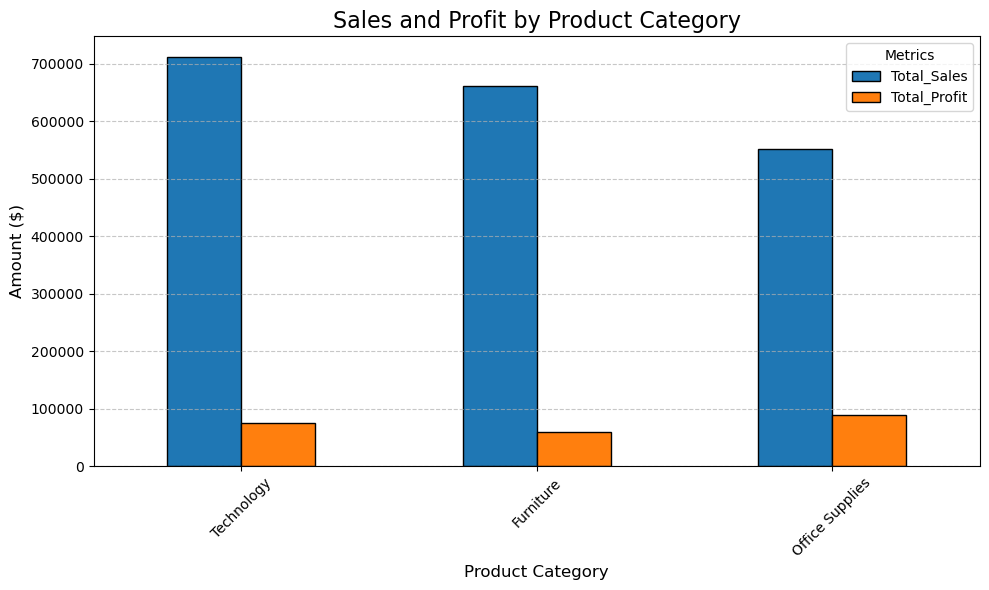

In [25]:
# Group data by Product Category for Sales and Profit

category_sales_profit = orders_data.groupby("Product Category").agg(

    Total_Sales=("Sales", "sum"),

    Total_Profit=("Profit", "sum")

).sort_values(by="Total_Sales", ascending=False)



# Display the analysis in a table format

print("Sales and Profit by Product Category:")
print(category_sales_profit)




# Plotting Sales and Profit by Category

fig, ax = plt.subplots(figsize=(10, 6))

category_sales_profit[['Total_Sales', 'Total_Profit']].plot(kind='bar', ax=ax, edgecolor='black')

plt.title('Sales and Profit by Product Category', fontsize=16)

plt.xlabel('Product Category', fontsize=12)

plt.ylabel('Amount ($)', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Metrics')

plt.show()



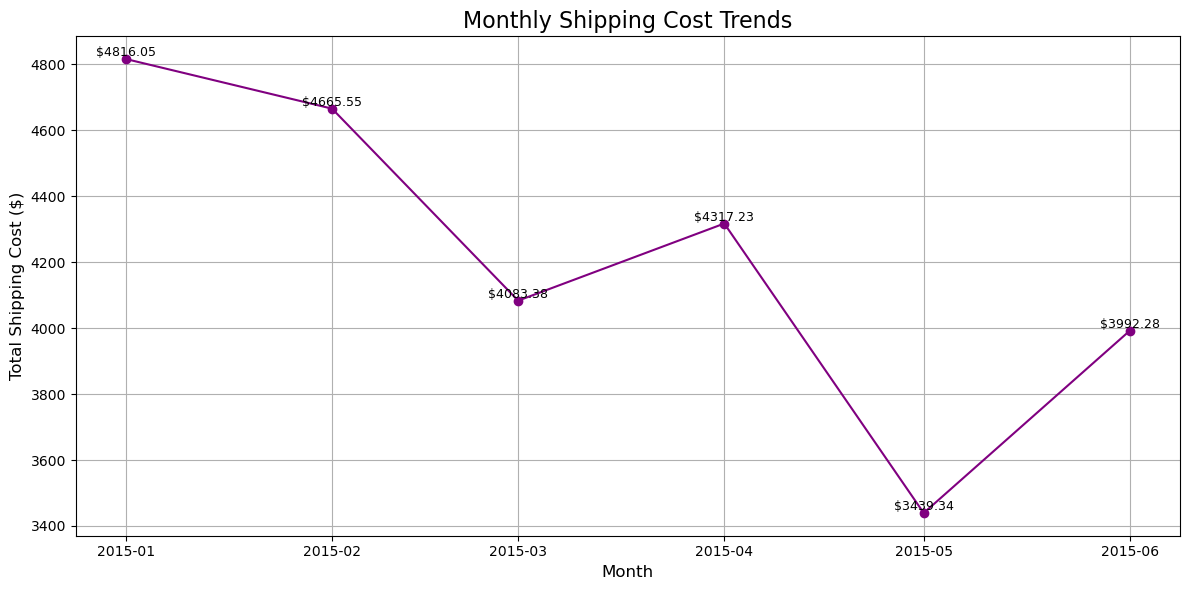

In [27]:
# Group data by Month for Shipping Cost Trends
shipping_cost_trends = orders_data.groupby(
    orders_data['Order Date'].dt.to_period("M")
).agg(Total_Shipping_Cost=("Shipping Cost", "sum")).reset_index()

# Convert Period to Timestamp for plotting
shipping_cost_trends['Order Date'] = shipping_cost_trends['Order Date'].dt.to_timestamp()


# Plotting Monthly Shipping Cost Trends with Annotations
plt.figure(figsize=(12, 6))
plt.plot(shipping_cost_trends['Order Date'], shipping_cost_trends['Total_Shipping_Cost'], marker='o', linestyle='-', color='purple')
plt.title('Monthly Shipping Cost Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Shipping Cost ($)', fontsize=12)
plt.grid(True)

# Annotating key points
for x, y in zip(shipping_cost_trends['Order Date'], shipping_cost_trends['Total_Shipping_Cost']):
    plt.text(x, y, f'${y:.2f}', fontsize=9, ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()



In [28]:
# Importing libraries for advanced visualization
import seaborn as sns

# Pie Chart for Shipping Modes by Total Sales
plt.figure(figsize=(8, 8))
plt.pie(
    shipping_modes_sales["Total_Sales"],
    labels=shipping_modes_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title('Shipping Modes Contribution to Total Sales', fontsize=16)
plt.tight_layout()
plt.show()

NameError: name 'shipping_modes_sales' is not defined

<Figure size 800x800 with 0 Axes>